In [35]:
# Dependencies
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import scipy

In [2]:
# read file

file = os.path.join('Resources', 'property_sales.csv')
sales_data = pd.read_csv(file)
sales_data.head()

,OBJECTID,CRV,Sale_Date,InRTOStudy,Neighborhoood,Ward,PropType,Address,HouseNumber,HouseNum,...,SuffixDire,Grantee,Grantor,Adjusted_S,Gross_Sale,SaleDate,Downpayment,X,Y,PIN_TEXT
0,10001,204924.0,2014-02-26T00:00:00.000Z,No,VICTORY,4,Residential,4526 Xerxes AVE N,4526,NaN,...,N,David Anderson,Janet L Rollmann,155103,159900.0,2014-02-26T00:00:00.000Z,15990.0,516655.530538,190166.659712,1111821330128
1,10002,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,N,Darryl L Bell,Deborah J Boardley,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138
2,10003,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,N,Darryl L Bell,Tracy Everson,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138
3,10004,71027.0,2014-07-18T00:00:00.000Z,Yes,VICTORY,4,Residential,4574 Xerxes AVE N,4574,NaN,...,N,Krista M Torning,Karen L Holland,162500,162500.0,2014-07-18T00:00:00.000Z,NaN,516641.329215,190769.809892,1111821330140
4,10005,272354.0,2014-10-10T00:00:00.000Z,Yes,LINDEN HILLS,13,Residential,4600 Xerxes AVE S,4600,NaN,...,S,Robert W Nichols III,Brian D Renbarger,277900,284900.0,2014-10-10T00:00:00.000Z,2000.0,516598.558439,146839.634287,1702824210001


In [9]:
# Find the null values indices in gross sales 

gross_null_indices=sales_data[~sales_data['Gross_Sale'].isna()]
gross_null_indices

,OBJECTID,CRV,Sale_Date,InRTOStudy,Neighborhoood,Ward,PropType,Address,HouseNumber,HouseNum,...,SuffixDire,Grantee,Grantor,Adjusted_S,Gross_Sale,SaleDate,Downpayment,X,Y,PIN_TEXT
0,10001,204924.0,2014-02-26T00:00:00.000Z,No,VICTORY,4,Residential,4526 Xerxes AVE N,4526,NaN,...,N,David Anderson,Janet L Rollmann,155103,159900.0,2014-02-26T00:00:00.000Z,15990.0,516655.530538,190166.659712,1111821330128
1,10002,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,N,Darryl L Bell,Deborah J Boardley,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138
2,10003,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,N,Darryl L Bell,Tracy Everson,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138
3,10004,71027.0,2014-07-18T00:00:00.000Z,Yes,VICTORY,4,Residential,4574 Xerxes AVE N,4574,NaN,...,N,Krista M Torning,Karen L Holland,162500,162500.0,2014-07-18T00:00:00.000Z,NaN,516641.329215,190769.809892,1111821330140
4,10005,272354.0,2014-10-10T00:00:00.000Z,Yes,LINDEN HILLS,13,Residential,4600 Xerxes AVE S,4600,NaN,...,S,Robert W Nichols III,Brian D Renbarger,277900,284900.0,2014-10-10T00:00:00.000Z,2000.0,516598.558439,146839.634287,1702824210001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10138,4996,NaN,2014-02-11T00:00:00.000Z,No,LIND-BOHANON,4,Residential,4514 Colfax AVE N,4514,NaN,...,N,William Lockett,Housing Unlimited LLC,100,100.0,2014-02-11T00:00:00.000Z,0.0,523532.174317,189729.645596,1211821340192
10139,4997,70353.0,2014-05-06T00:00:00.000Z,Yes,LIND-BOHANON,4,Residential,4514 Colfax AVE N,4514,NaN,...,N,Housing Unlimited LLC,Linda Beecham,87500,87500.0,2014-05-06T00:00:00.000Z,NaN,523532.174317,189729.645596,1211821340192
10140,4998,238773.0,2014-07-09T00:00:00.000Z,Yes,EAST HARRIET,13,Residential,4525 Colfax AVE S,4525,NaN,...,S,Ian Schwartz,Roderick S Taylor,593000,599000.0,2014-07-09T00:00:00.000Z,38500.0,523725.388360,147206.008621,902824440140
10141,4999,238773.0,2014-07-09T00:00:00.000Z,Yes,EAST HARRIET,13,Residential,4525 Colfax AVE S,4525,NaN,...,S,Ian Schwartz,Grant Bender,593000,599000.0,2014-07-09T00:00:00.000Z,38500.0,523725.388360,147206.008621,902824440140


In [10]:
sales_data['Gross_Sale']

0        159900.0
1        169500.0
2        169500.0
3        162500.0
4        284900.0
           ...   
10138       100.0
10139     87500.0
10140    599000.0
10141    599000.0
10142     42000.0
Name: Gross_Sale, Length: 10006, dtype: float64

In [13]:
# box plot to see outliers

px.box(sales_data['Gross_Sale'])

In [15]:
#removing outliers from data

upper_fence = 571169
lower_fence = 0
non_outliers = sales_data[sales_data["Gross_Sale"].between(lower_fence, upper_fence)]

In [22]:
#filtered data without outliers
px.box(non_outliers["Gross_Sale"])

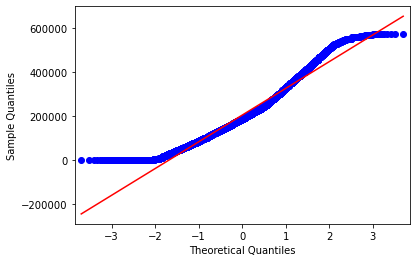

In [23]:
#Normality test
qqplot(non_outliers["Gross_Sale"], line="s")
plt.show()

In [46]:
# Create two random samples

sample1 = sales_data['Gross_Sale'].sample(n=2000)
sample2 = sales_data['Gross_Sale'].sample(n=2000)

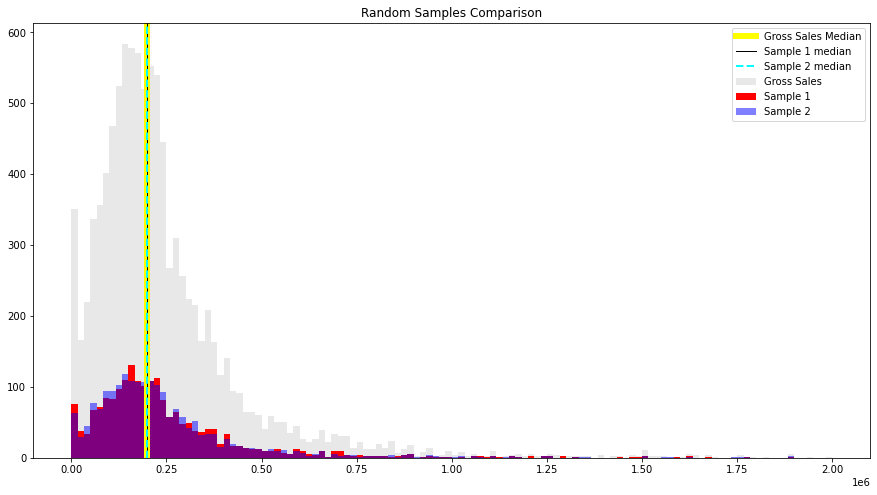

In [48]:

# Plot histograms of both samples and indicate their median values

plt.figure(figsize=[15,8])
#plt.subplot(1,1,1)

plt.hist(sales_data['Gross_Sale'], bins=120, range=(0,2000000), alpha=0.5, color='lightgrey')
plt.hist(sample1, bins=120,range=(0,2000000), color='red')
plt.hist(sample2, bins=120, range=(0,2000000), alpha=0.5, color='blue')

plt.axvline(sales_data['Gross_Sale'].median(),color='yellow', linewidth=6)
plt.axvline(sample1.median(), linewidth=1, color='black')
plt.axvline(sample2.median(),color='cyan', linewidth=2, linestyle='dashed')
plt.legend(['Gross Sales Median', 'Sample 1 median', 'Sample 2 median','Gross Sales','Sample 1', 'Sample 2'])
plt.title("Random Samples Comparison")
plt.show()

In [49]:
scipy.stats.ttest_ind(sample1,sample2)

Ttest_indResult(statistic=-1.3685332050846963, pvalue=0.1712221295762171)

# FINDINGS

### The median values for both distributions are similar as compared to the property data 
### The pvalue from the t-test which is higher than an alpha value of 0.05 shows the two distributions are similar indicating the two distributions are likely drawn from the same population.
###  The similarity between the distribution and median values suggests that the samples were obtained from the same population.